In [1]:
# 1.(a)
import pandas as pd
drink = pd.read_csv("strongdrink.txt")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette(sns.color_palette("deep"))
sns.set()

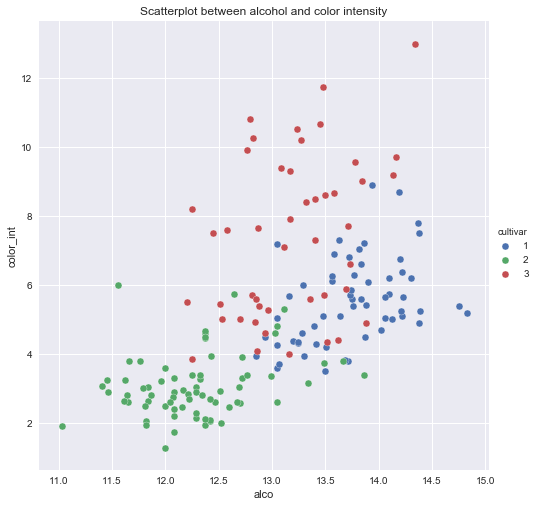

In [3]:
sns.pairplot(x_vars = ["alco"], y_vars = ["color_int"], data = drink, hue = "cultivar", size = 7)
plt.title("Scatterplot between alcohol and color intensity")
plt.show()

In [4]:
# 1.(b)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np

In [5]:
Xvars = drink[["alco", "malic", "tot_phen", "color_int"]].values
yvals = drink["cultivar"].values

k = 4
kf = KFold(n_splits = k, shuffle = True, random_state = 22)
kf.get_n_splits(Xvars)

4

In [6]:
def log_simulation(penalty_param, c):
    
    k_ind = 0
    MSE = np.zeros(k)
    
    for train_index, test_index in kf.split(Xvars):
        
        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvals[train_index], yvals[test_index]

        LogReg = LogisticRegression(penalty = penalty_param, C = c, fit_intercept = True,
                                    solver = "saga", multi_class = "multinomial")
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        
        error = y_test != y_pred
        MSE[k_ind] = error.mean()
        k_ind += 1
        
    return MSE.mean()

In [7]:
MSE_l1_total = []
MSE_l2_total = []
c_param = np.linspace(0.01, 3, 300)

for c in c_param:
    MSE_l1_total += [log_simulation("l1", c)]
    MSE_l2_total += [log_simulation("l2", c)]

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
result_log = pd.DataFrame(np.column_stack([c_param, MSE_l1_total, MSE_l2_total]), 
                          columns = ["c_value", "MSE_l1", "MSE_l2"])

In [9]:
result_log.sort_values(["MSE_l1"]).head(25)

,c_value,MSE_l1,MSE_l2
149,1.50,0.125,0.125000
101,1.02,0.125,0.130682
102,1.03,0.125,0.130682
103,1.04,0.125,0.130682
104,1.05,0.125,0.130682
105,1.06,0.125,0.130682
106,1.07,0.125,0.130682
107,1.08,0.125,0.130682
108,1.09,0.125,0.130682
109,1.10,0.125,0.130682


In [10]:
result_log.sort_values(["MSE_l2"]).head(25)

,c_value,MSE_l1,MSE_l2
149,1.50,0.125000,0.125
203,2.04,0.130682,0.125
202,2.03,0.130682,0.125
201,2.02,0.130682,0.125
200,2.01,0.130682,0.125
199,2.00,0.130682,0.125
198,1.99,0.130682,0.125
204,2.05,0.130682,0.125
197,1.98,0.130682,0.125
195,1.96,0.130682,0.125


If we want to play with penalty parameter, the only method we can choose is "saga", although using newton-cg method can obtain lowerer MSE. The minimized overall MSE is 0.125, with penalty = "l1" and c in [0.49, 1.58]; or with penalty = "l2" and c in [1.25, 3] 

In [11]:
#1.(c)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [12]:
def rand_simulation(estimators, depth, samples):
    Rand = RandomForestClassifier(n_estimators = estimators, max_depth = depth, 
                                  min_samples_leaf = samples,
                                  random_state = 22, bootstrap = True, oob_score = True)
    Rand.fit(Xvars, yvals)
    
    return 1 - Rand.oob_score_

In [13]:
MSE_rand_total = []
estimators_total = []
depth_total = []
samples_total = []

estimators = np.linspace(10, 100, 20)
depth = np.linspace(1, 10, 10)
samples = np.linspace(2, 20, 10)

for e in estimators:
    for d in depth:
        for s in samples:
            MSE_rand_total += [rand_simulation(int(e), int(d), int(s))]
            estimators_total += [int(e)]
            depth_total += [int(d)]
            samples_total += [int(s)]       

In [14]:
result_rand = pd.DataFrame(
    np.column_stack([estimators_total, depth_total, samples_total, MSE_rand_total]), 
    columns = ["n_estimators", "max_depth", "min_samples_leaf", "MSE"])

In [15]:
result_rand.sort_values(["MSE"]).head(25)

,n_estimators,max_depth,min_samples_leaf,MSE
1790,90.0,10.0,2.0,0.056818
1940,100.0,5.0,2.0,0.056818
1650,85.0,6.0,2.0,0.056818
1340,71.0,5.0,2.0,0.056818
1880,95.0,9.0,2.0,0.056818
1750,90.0,6.0,2.0,0.056818
1670,85.0,8.0,2.0,0.056818
1780,90.0,9.0,2.0,0.056818
1690,85.0,10.0,2.0,0.056818
1970,100.0,8.0,2.0,0.056818


The minimized overall MSE is 0.056818, with n_estimators in [70, 100], max_depth in [6, 10], min_samples_leaf = 2.

In [16]:
#1.(d)
from sklearn import svm

def svm_simulation(C, g):
    
    k_ind = 0
    MSE = np.zeros(k)

    for train_index, test_index in kf.split(Xvars):

        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvals[train_index], yvals[test_index]

        svc = svm.SVC(kernel = "rbf", C = c, gamma = g)
        svc.fit(X_train, y_train)
        y_pred = svc.predict(X_test)

        error = y_test != y_pred
        MSE[k_ind] = error.mean()

        k_ind += 1

        return MSE.mean()

In [17]:
MSE_svm_total = []
C_total = []
gamma_total = []

C = np.linspace(1, 100, 100)
gamma = np.linspace(0.05, 1, 20)

for c in C:
    for g in gamma:
        MSE_svm_total += [svm_simulation(c, g)]
        C_total += [c]
        gamma_total += [g]     

In [18]:
result_svm = pd.DataFrame(np.column_stack([C_total, gamma_total, MSE_svm_total]), 
                          columns = ["C", "gamma", "MSE"])

In [19]:
result_svm.sort_values(["MSE"]).head(25)

,C,gamma,MSE
23,2.0,0.20,0.005682
43,3.0,0.20,0.005682
42,3.0,0.15,0.005682
61,4.0,0.10,0.005682
62,4.0,0.15,0.005682
81,5.0,0.10,0.005682
24,2.0,0.25,0.005682
121,7.0,0.10,0.005682
101,6.0,0.10,0.005682
93,5.0,0.70,0.011364


The minimized overall MSE is 0.005682, with cost in [2,7] and gamma in [0.10, 0.25].

In [20]:
#1.(e)
from sklearn.neural_network import MLPClassifier

def mlp_simulation(h, ac, al):
    
    k_ind = 0
    MSE = np.zeros(k)

    for train_index, test_index in kf.split(Xvars):

        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvals[train_index], yvals[test_index]

        mlp = MLPClassifier(hidden_layer_sizes = h, activation = ac, alpha = al)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        error = y_test != y_pred
        MSE[k_ind] = error.mean()

        k_ind += 1

        return MSE.mean()

In [33]:
MSE_mlp_total = []
hidden_total = []
activation_total = []
alpha_total = []

hidden = np.linspace(50, 500, 10)
hidden = [(int(h),) for h in hidden]
activation = np.array(["identity", "logistic", "tanh", "relu"])
alpha = np.logspace(-3, 3, 7)
 
for h in hidden:
    for ac in activation:
        for al in alpha:
            MSE_mlp_total += [mlp_simulation(h, ac, al)]
            hidden_total += [h]
            activation_total += [ac]
            alpha_total += [al]     

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
result_mlp = pd.DataFrame(np.column_stack([hidden_total, activation_total, alpha_total, MSE_mlp_total]), 
                          columns = ["hidden_layer", "activation", "alpha", "MSE"])

In [35]:
result_mlp.sort_values(["MSE"]).head(25)

,hidden_layer,activation,alpha,MSE
238,450,tanh,0.001,0.011363636363636364
183,350,tanh,0.01,0.011363636363636364
267,500,tanh,0.01,0.011363636363636364
266,500,tanh,0.001,0.011363636363636364
182,350,tanh,0.001,0.011363636363636364
191,350,relu,0.1,0.011363636363636364
240,450,tanh,0.1,0.011363636363636364
241,450,tanh,1.0,0.011363636363636364
184,350,tanh,0.1,0.011363636363636364
246,450,relu,0.01,0.011363636363636364


The minimized overall MSE is 0.011363636363636364, with hidden layer size in [350, 400], activation in {tanh, relu} and alpha in {0.001, 0,01, 0,01, 1}.

In [42]:
#1.(f)
print("The best combination for LogisticRegression is:")
print(result_log.sort_values(["MSE_l1"]).head(1))
print("")
print("The best combination for RandomForestClassifier is:")
print(result_rand.sort_values(["MSE"]).head(1))
print("")
print("The best combination for SupportVectorMachine is:")
print(result_svm.sort_values(["MSE"]).head(1))
print("")
print("The best combination for MLPClassifier is:")
print(result_mlp.sort_values(["MSE"]).head(1))

The best combination for LogisticRegression is:
     c_value  MSE_l1  MSE_l2
149      1.5   0.125   0.125

The best combination for RandomForestClassifier is:
      n_estimators  max_depth  min_samples_leaf       MSE
1790          90.0       10.0               2.0  0.056818

The best combination for SupportVectorMachine is:
      C  gamma       MSE
23  2.0    0.2  0.005682

The best combination for MLPClassifier is:
    hidden_layer activation  alpha                   MSE
238          450       tanh  0.001  0.011363636363636364


1.(f)
I believe that the support vector machine is the best predictor of cultivar, because it has the lowest MSE. The second best is neural network, followed by random forest. The logistics regression is the worst one among these four models.